<a href="https://colab.research.google.com/github/germfsip/2231Procesamiento-digital-de-imagenes/blob/main/PDI_Clase9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

Cargamos una imagen


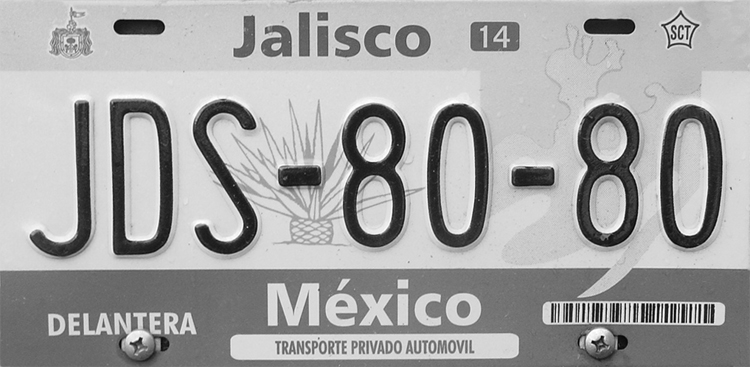

Tamaño =  (367, 750)
Alto =  367
Ancho =  750
Valor max  =  255
Valor min  =  1


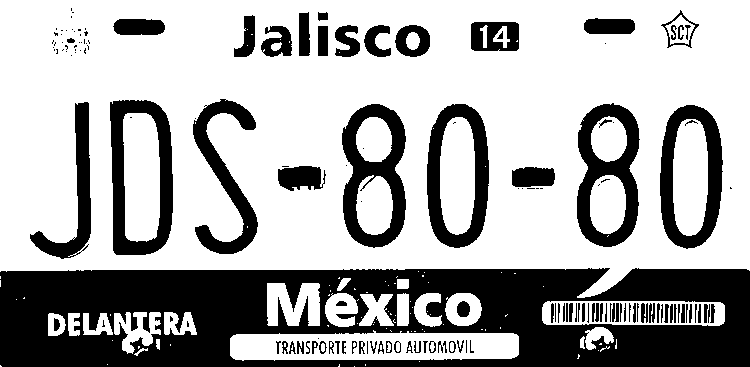

127.0

In [ ]:
img = cv2.imread('placa.jpg', 0)
cv2_imshow(img)



def medidas(imagen):
  print('Tamaño = ',imagen.shape)
  print('Alto = ',imagen.shape [0])
  print('Ancho = ',imagen.shape [1])
  print('Valor max  = ',np.max(imagen))
  print('Valor min  = ',np.min(imagen))

medidas(img)
ret, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY)
cv2_imshow(img)
ret

Creamos la máscara

In [ ]:
kernel1 = cv2.getStructuringElement (cv2.MORPH_RECT, (5, 5)) # Estructura rectangular
kernel2 = cv2.getStructuringElement (cv2.MORPH_ELLIPSE, (5, 5)) # Estructura de elipse
kernel3 = cv2.getStructuringElement (cv2.MORPH_CROSS, (5, 5)) # Estructura cruzada

print("Elemento estructural rectancular\n",kernel1)
print("Elemento estructural elipse\n", kernel2)
print("Elemento estructural cruz\n", kernel3)

Elemento estructural rectancular
 [[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
Elemento estructural elipse
 [[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]
Elemento estructural cruz
 [[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


Erosion y frontera

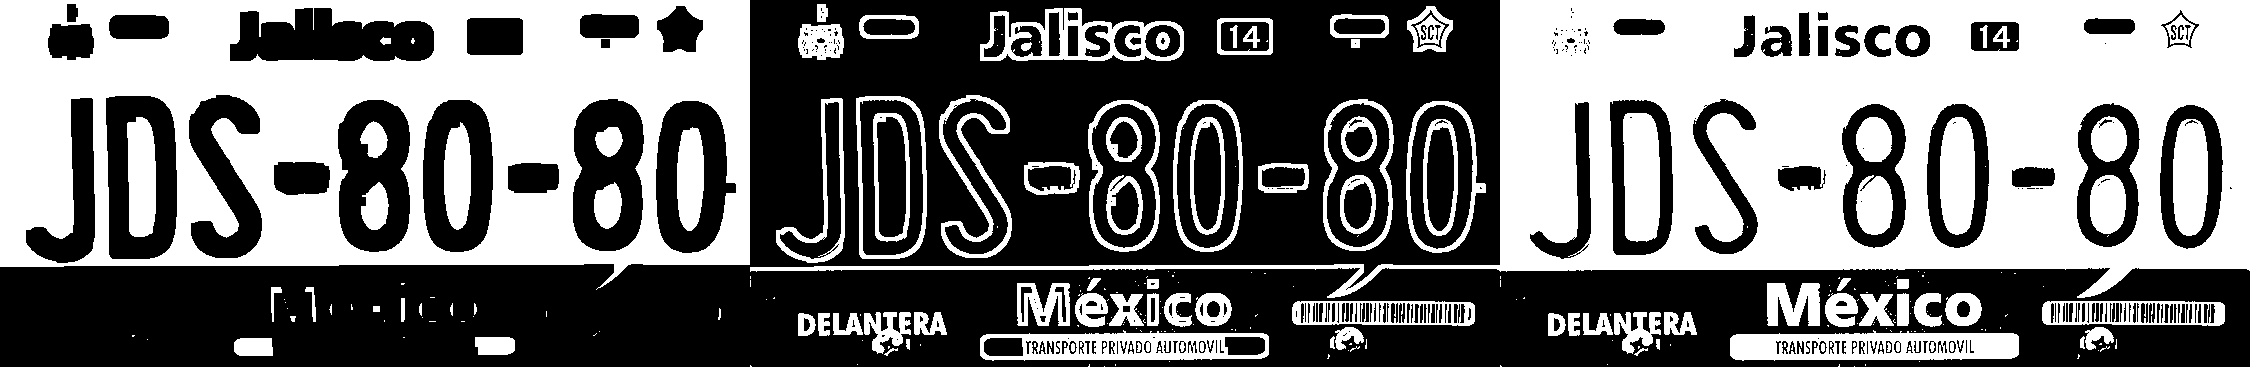

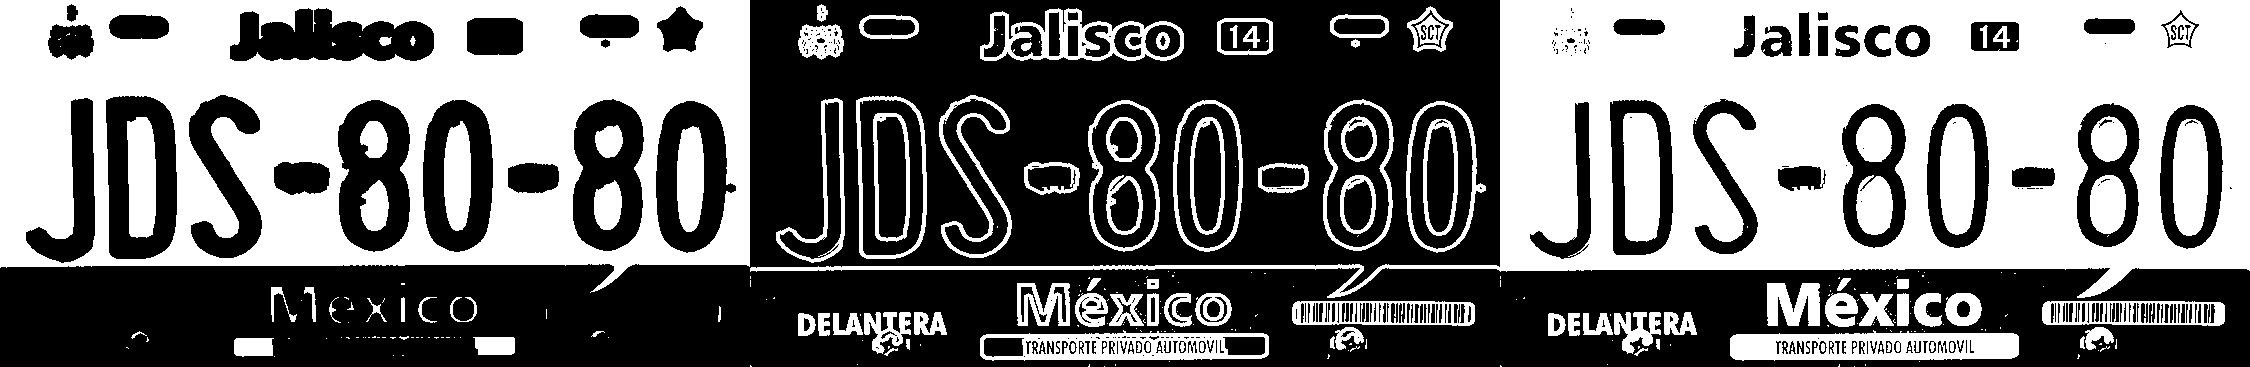

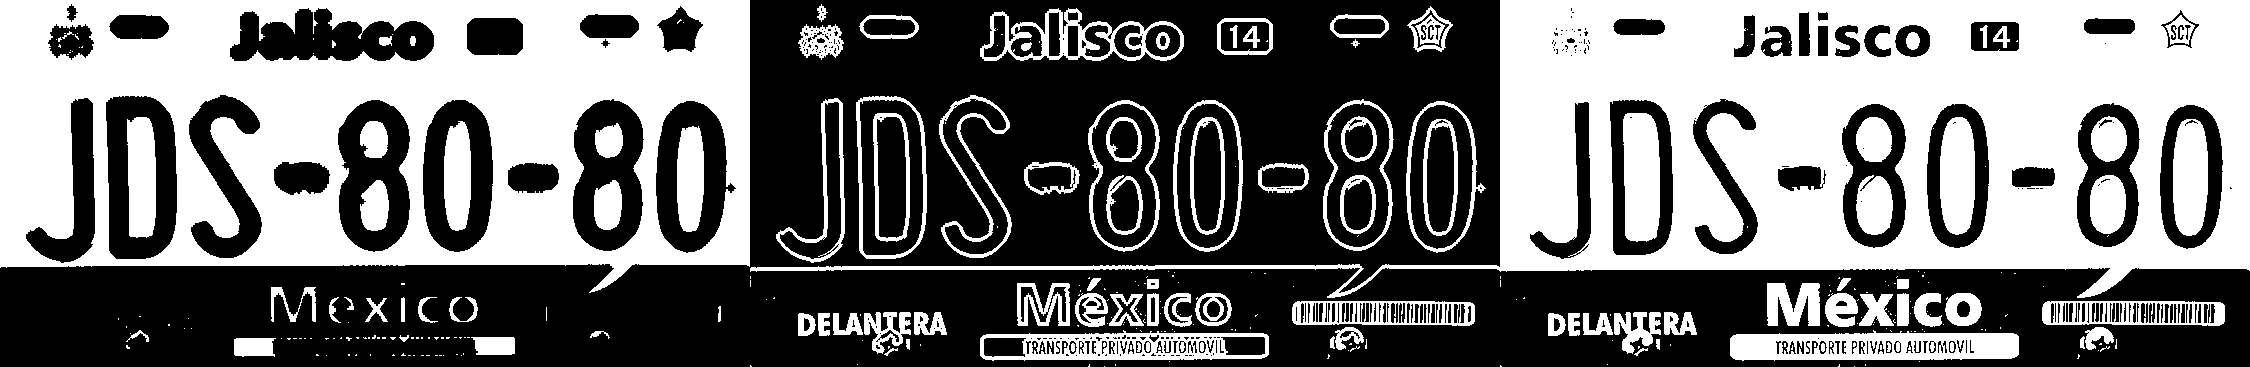

In [ ]:
erosion = cv2.erode(img, kernel1, iterations=2)
#cv2_imshow(erosion)

frontera = img - erosion
#cv2_imshow(frontera)

imagenes= np.hstack((erosion, frontera, img))
cv2_imshow(imagenes)

erosion = cv2.erode(img, kernel2, iterations=2)
#cv2_imshow(erosion)

frontera = img - erosion
#cv2_imshow(frontera)

imagenes= np.hstack((erosion, frontera, img))
cv2_imshow(imagenes)

erosion = cv2.erode(img, kernel3, iterations=2)
#cv2_imshow(erosion)

frontera = img - erosion
#cv2_imshow(frontera)

imagenes= np.hstack((erosion, frontera, img))
cv2_imshow(imagenes)

Dilatación y Rellenado

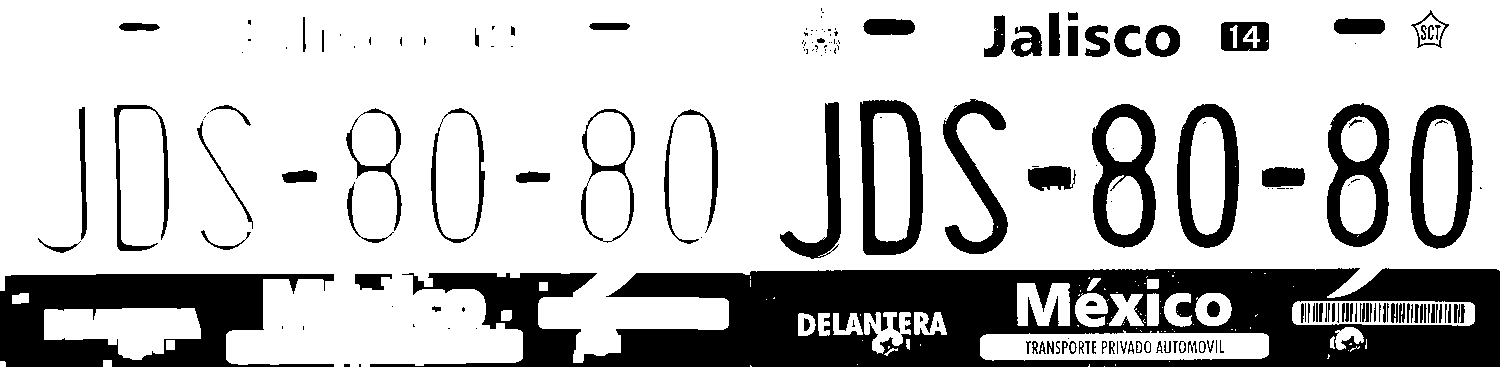

In [ ]:
dilatacion=cv2.dilate(img, kernel1, iterations=2)
imagenes= np.hstack((dilatacion, img))
cv2_imshow(imagenes)
#dilatacion=cv2.dilate(img, kernel2, iterations=2)
#imagenes= np.hstack((dilatacion, img))
#cv2_imshow(imagenes)
#dilatacion=cv2.dilate(img, kernel3, iterations=2)
#imagenes= np.hstack((dilatacion, img))
#cv2_imshow(imagenes)

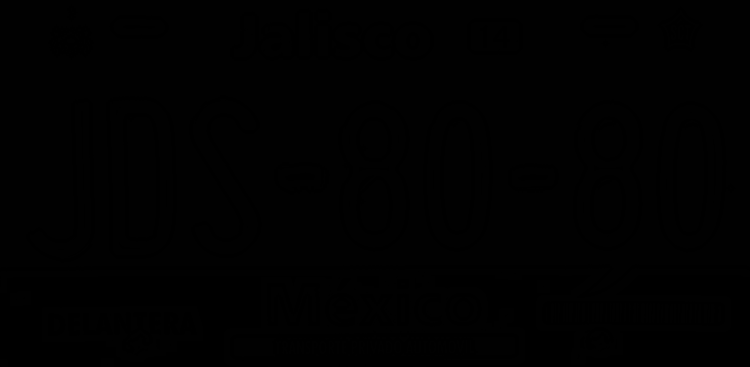

In [ ]:
relleno=frontera-dilatacion
dilatacion=cv2.dilate(dilatacion,kernel1, iterations=1)
relleno=frontera-dilatacion
cv2_imshow(relleno)

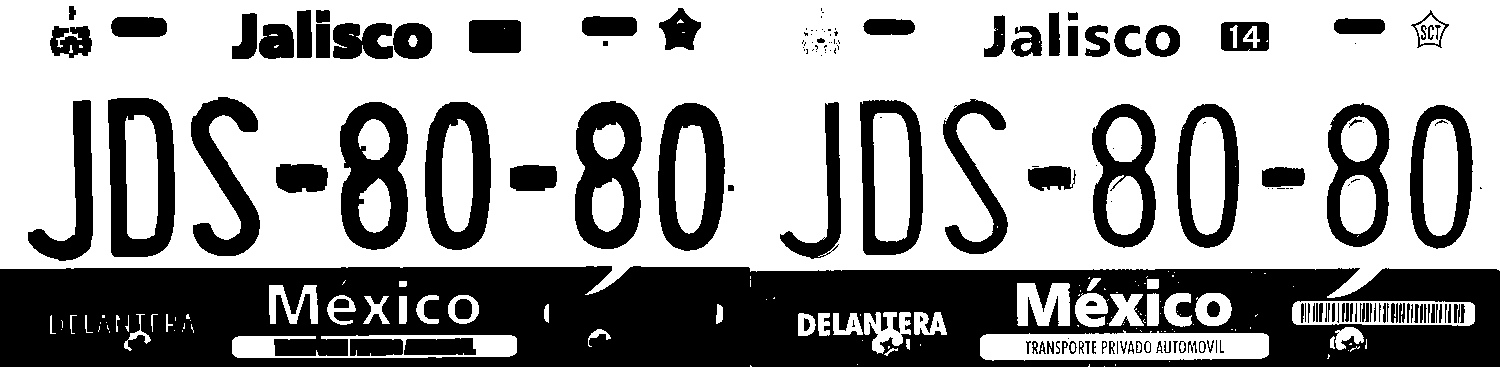

In [ ]:
hit= cv2.morphologyEx(img, cv2.MORPH_HITMISS, kernel1, iterations=1)
imagenes= np.hstack((hit, img))
cv2_imshow(imagenes)

Apertura

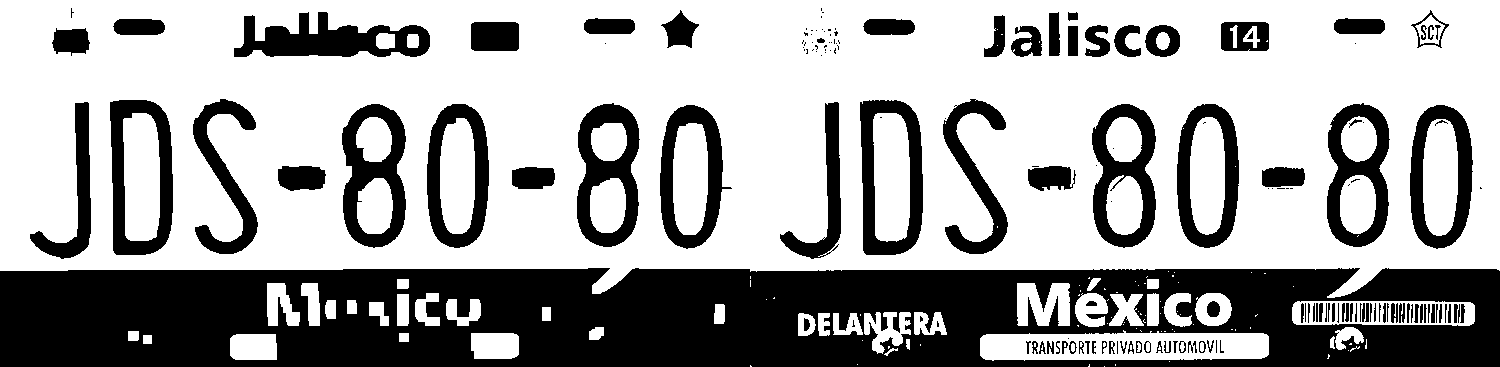

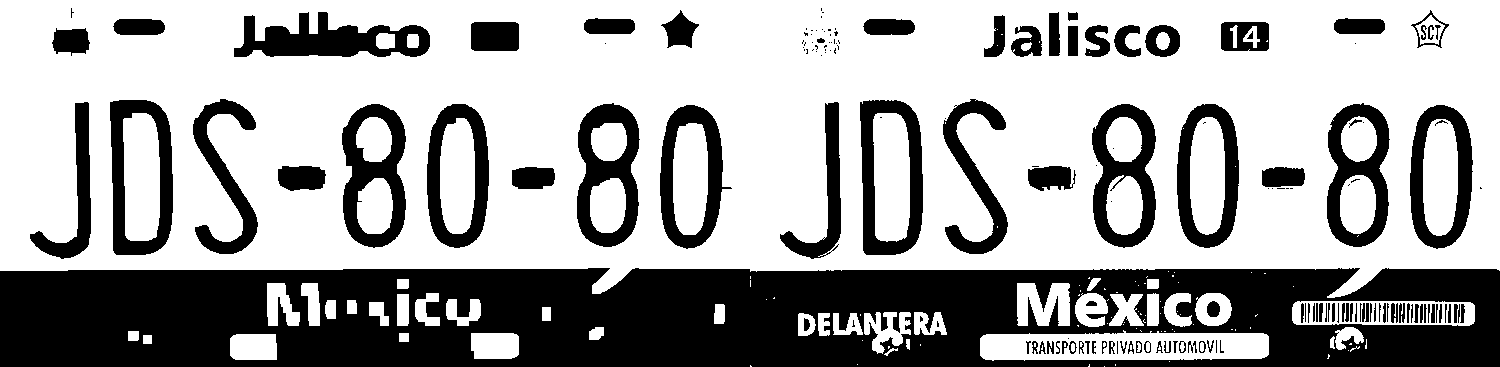

In [ ]:
apertura=cv2.erode(img,kernel1, iterations=2)
apertura=cv2.dilate(apertura, kernel1, iterations=2)

imagenes= np.hstack((apertura, img))
cv2_imshow(imagenes)

apertura2 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1, iterations=2)
imagenes= np.hstack((apertura2, img))
cv2_imshow(imagenes)

Cierre

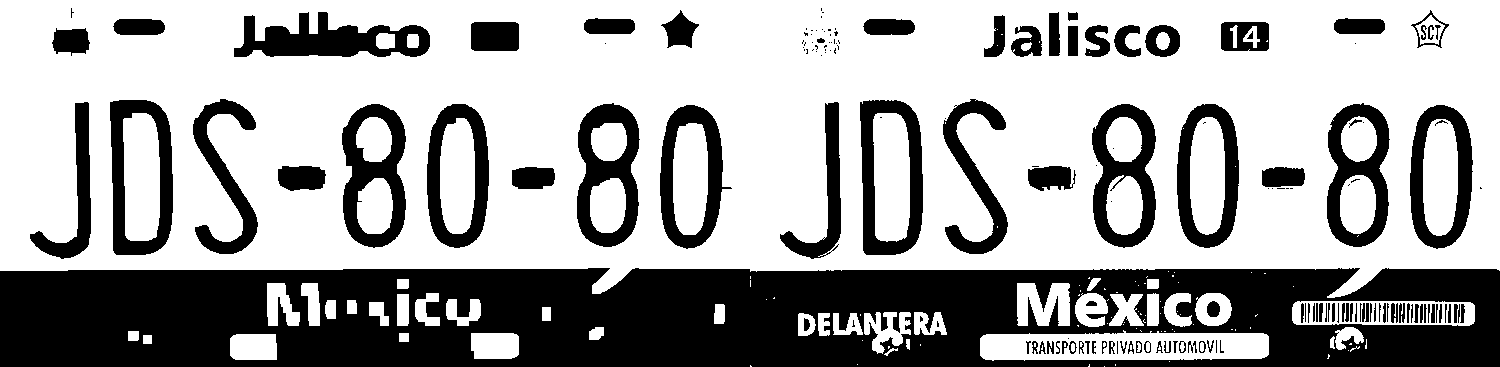

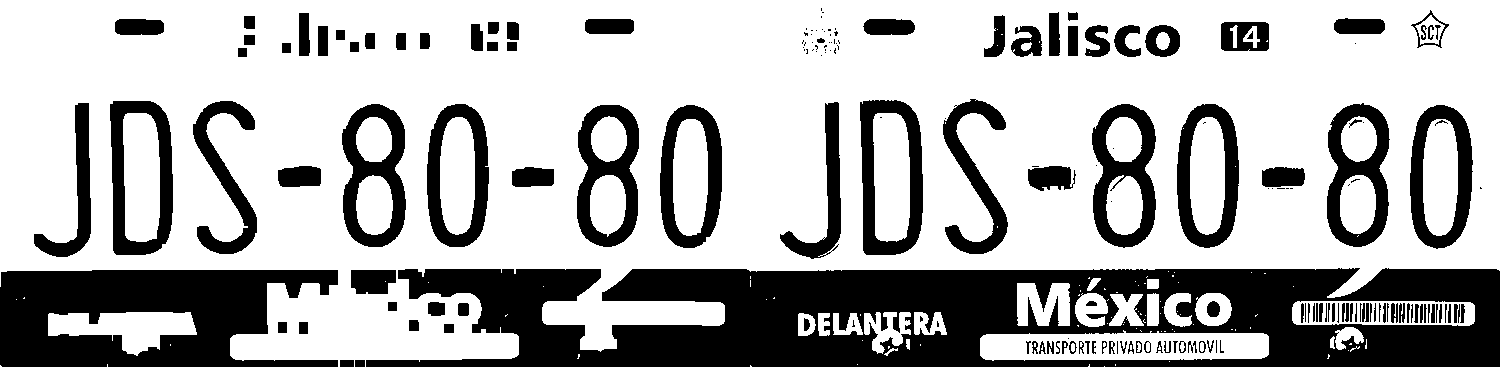

In [ ]:
cierre=cv2.dilate(img,kernel1, iterations=2)
cierre=cv2.erode(apertura, kernel1, iterations=2)

imagenes= np.hstack((apertura, img))
cv2_imshow(imagenes)

cierre2 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1, iterations=2)
imagenes= np.hstack((cierre2, img))
cv2_imshow(imagenes)

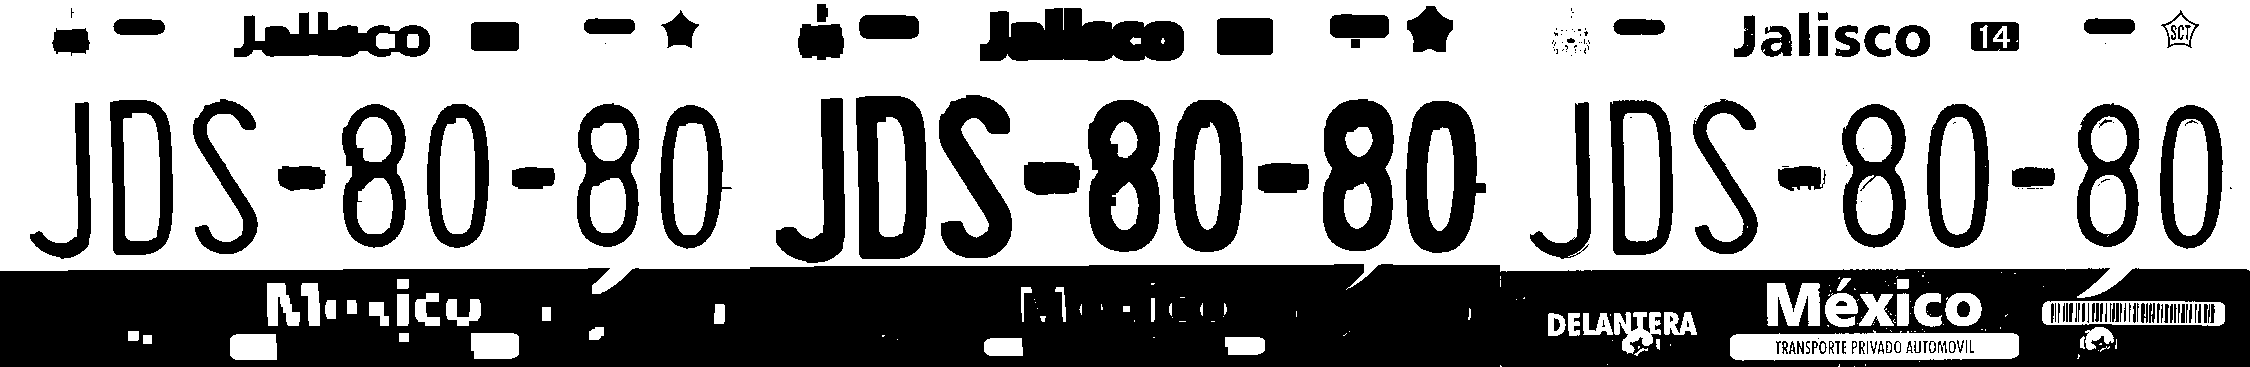

In [ ]:
imagenes= np.hstack((apertura,cierre, img))
cv2_imshow(imagenes)

Eliminación ruido sal y pimienta

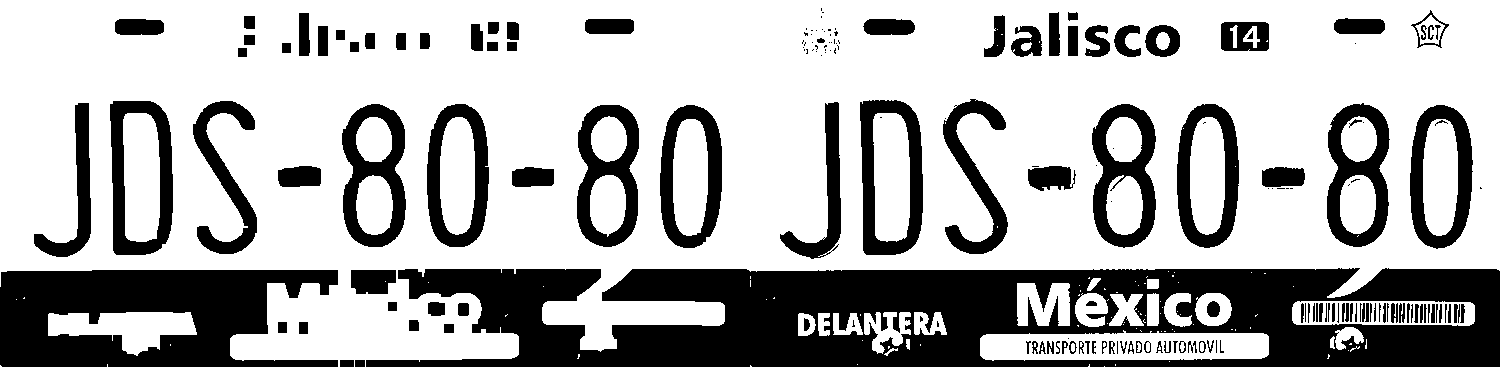

In [ ]:
sal=cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel1, iterations=2)
sal=cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel1, iterations=2)

imagenes= np.hstack((sal, img))
cv2_imshow(imagenes)